In [17]:
import cv2
import depthai as dai
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import IPython.display as ipd
from IPython.display import Image as IPyImage
import cv2
from PIL import Image
import io



# Create a pipeline
pipeline = dai.Pipeline()

# Define the source for the color camera
cam_rgb = pipeline.createColorCamera()
cam_rgb.setBoardSocket(dai.CameraBoardSocket.RGB)
cam_rgb.setResolution(dai.ColorCameraProperties.SensorResolution.THE_1080_P)


C:\Users\User\AppData\Local\Temp\ipykernel_3332\1407389612.py:18: DeprecationWarning: RGB is deprecated, use CAM_A or address camera by name instead.
  cam_rgb.setBoardSocket(dai.CameraBoardSocket.RGB)


In [18]:
# Create an XLink output for the RGB camera
xout_rgb = pipeline.createXLinkOut()
xout_rgb.setStreamName("rgb")
cam_rgb.video.link(xout_rgb.input)


In [19]:
# Connect to the device and start the pipeline
device = dai.Device(pipeline)
device.startPipeline()

# Output queue for receiving the RGB frames
queue_rgb = device.getOutputQueue(name="rgb", maxSize=4, blocking=False)


C:\Users\User\AppData\Local\Temp\ipykernel_3332\1074805571.py:3: DeprecationWarning: Device(pipeline) starts the pipeline automatically. Use Device() and startPipeline(pipeline) otherwise
  device.startPipeline()


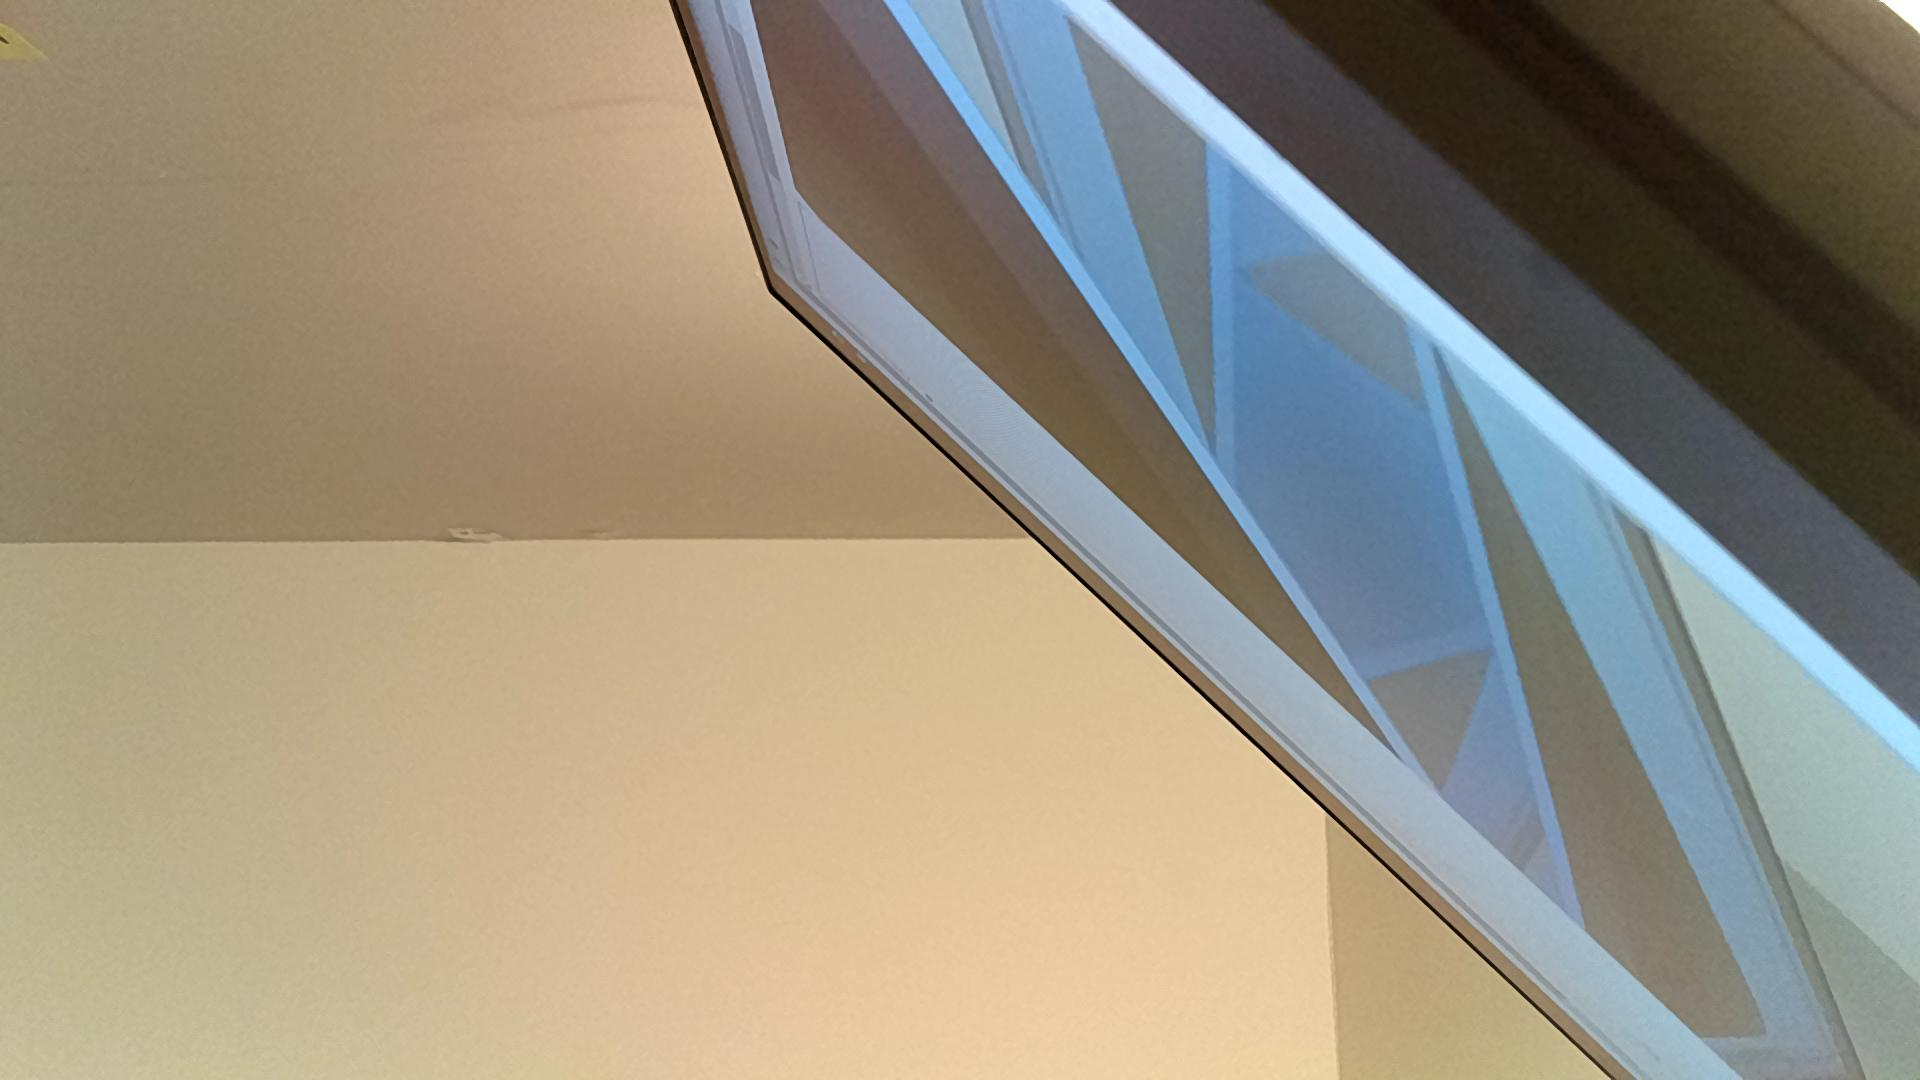

KeyboardInterrupt: 

In [20]:
while True:
    in_rgb = queue_rgb.get()
    frame_rgb = in_rgb.getCvFrame()
    frame_rgb = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(frame_rgb)
    buf = io.BytesIO()
    img_pil.save(buf, format='jpeg')
    clear_output(wait=True)
    display(IPyImage(data=buf.getvalue()))


    # Break the loop if you interrupt the kernel in Jupyter
